In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pheno1, pheno2 = "abundance", "surface2"

df = pd.read_csv(f"../data/kir21/kir21_effect_{pheno1}_{pheno2}.csv")

In [4]:
from cosmos import DMSData, PriorFactory, ModelBuilder, ModelAnalyzer

data_obj = DMSData(
    df,
    [pheno1, pheno2],
    include_type=["missense"],
    exclude_type=[
        "synonymous",
        "insertion1",
        "insertion2",
        "insertion3",
        "deletion1",
        "deletion2",
        "deletion3",
    ],
    min_num_variants_per_group=10,
)
prior = PriorFactory(data_obj)
prior.gen_prior(
    x_name="beta_hat_1",
    y_name="beta_hat_2",
    x_se_name="se_hat_1",
    x_gmm_n_components=2,
)
model = ModelBuilder(prior, f"results/{pheno1}_{pheno2}/")

In [5]:
analyzer = ModelAnalyzer(model, f"results/{pheno1}_{pheno2}/analysis/", False)
df_sum = analyzer.summary(
    rank=1, save=True
)  # The summary table will be saved to the data_path
df_sum

,position,group,model_rank1,tau_mean,tau_std,gamma_mean,gamma_std
0,2.0,1,model_5,NaN,NaN,0.629284,0.275893
1,3.0,2,model_5,NaN,NaN,0.717805,0.254125
2,4.0,3,model_6,0.474483,0.278360,0.680578,0.448206
3,5.0,4,model_6,0.475656,0.284296,1.253374,0.405198
4,6.0,5,model_6,0.413907,0.274230,0.736984,0.391255
...,...,...,...,...,...,...,...
418,420.0,417,model_4,0.738610,0.251215,NaN,NaN
419,421.0,418,model_4,0.641552,0.245802,NaN,NaN
420,422.0,419,model_4,0.494447,0.245061,NaN,NaN
421,423.0,420,model_4,0.867934,0.249149,NaN,NaN


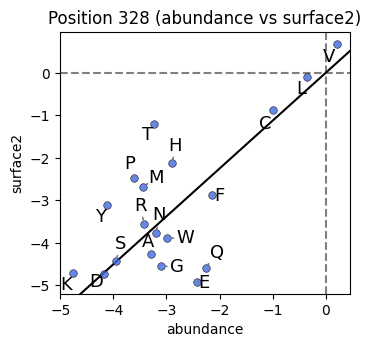

In [6]:
from cosmos.model_analyzer.plot import plot_position

_ = plot_position(analyzer, 328)